# Sampling and Interpolation of a Sinusoidal Signal

In [1]:
from pylab import *     # Imports numpy (as np) and matplotlib (as mpl)
%matplotlib notebook
                        # Adds interactive matplotlib backend
plt.rc('text', usetex=True)   # Enable the use of LaTeX for plot titles/labels

Generate a time axis (tt) and a sine signal (st) with duration 0.1 sec, frequency 100 Hz and sampling rate 250 samples/sec

In [2]:
Fs = 250     # Sampling rate
tlen = 0.1   # Time length in seconds
f0 = 100     # Frequency in Hz
tt = arange(round(tlen*Fs))/float(Fs)   # Time axis
st = sin(2*pi*f0*tt)   # Sinusoidal signal

Plot st in a half-height interactive graph. Label the x and y axes of the plot and add a title. Note that you can use LaTeX for formulas.

This does not look like a sine even though Nyquist is satisfied. Let's try to interpolate by a factor of M

<IPython.core.display.Javascript object>


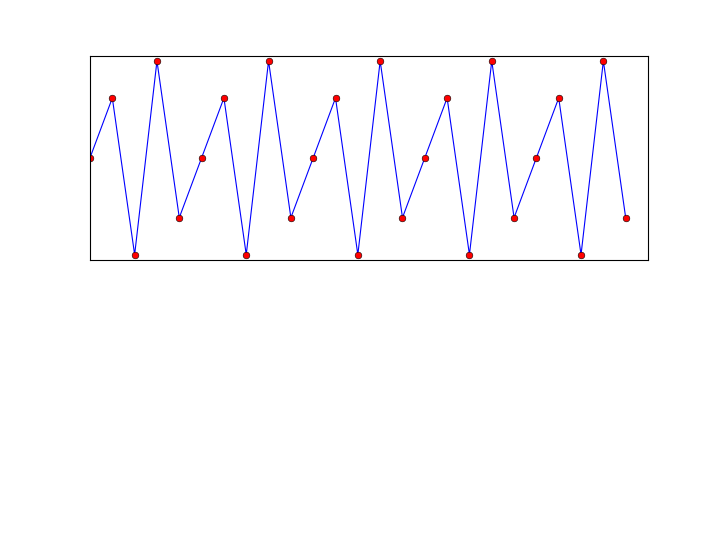

In [3]:
f1 = plt.figure(figsize=(9,7))    # figsize is w,h in inches
af11 = f1.add_subplot(211)         # Select upper half-plot
af11.plot(tt,st,'-b',tt,st,'or')
af11.set_xlabel('t [sec]',fontsize=12)
af11.set_ylabel('s(t)',fontsize=12)
af11.set_title(r'Sine $f_0$={:.2f} Hz, $F_s$={:d} samples/sec'.format(f0,Fs),fontsize=16)
af11.grid()
af12 = f1.add_subplot(212)         # Select lower half-plot
af12.stem(tt,st,'.-r')
af11.set_xlabel('t [sec]',fontsize=12)
af11.set_ylabel('s(t)',fontsize=12)
af12.grid()

In [4]:
M = 4
Fs2 = M * Fs    # Upsampling by a factor of M
stM = st
for i in range(1,M):
    stM = vstack([stM,zeros(len(st))])   # We need M-1 rows of zeros
print(stM)

[[  0.00000000e+00   5.87785252e-01  -9.51056516e-01   9.51056516e-01
   -5.87785252e-01  -4.89858720e-16   5.87785252e-01  -9.51056516e-01
    9.51056516e-01  -5.87785252e-01  -9.79717439e-16   5.87785252e-01
   -9.51056516e-01   9.51056516e-01  -5.87785252e-01  -1.46957616e-15
    5.87785252e-01  -9.51056516e-01   9.51056516e-01  -5.87785252e-01
   -1.95943488e-15   5.87785252e-01  -9.51056516e-01   9.51056516e-01
   -5.87785252e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+

In [5]:
stMf = stM.flatten('F')   # Now we convert the matrix to a 1-dim array
print(stMf)               # Each sample from st is followed by M-1 zeros

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   5.87785252e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -9.51056516e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   9.51056516e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -5.87785252e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -4.89858720e-16   0.00000000e+00   0.00000000e+00   0.00000000e+00
   5.87785252e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -9.51056516e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   9.51056516e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -5.87785252e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -9.79717439e-16   0.00000000e+00   0.00000000e+00   0.00000000e+00
   5.87785252e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -9.51056516e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   9.51056516e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -5.87785252e-01   0.00000000e+00

<IPython.core.display.Javascript object>


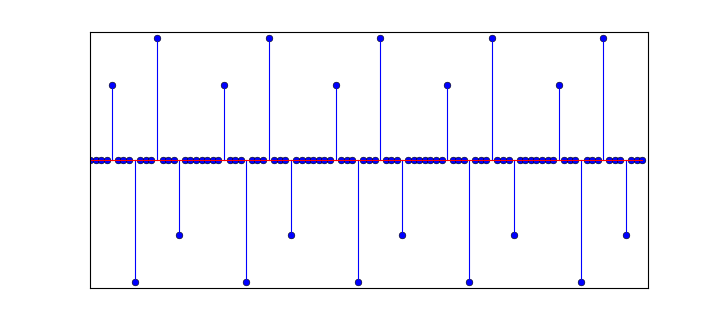

In [6]:
ttM = arange(len(stMf))/float(Fs2)
f2 = plt.figure(figsize=(9,4))
af2 = f2.add_subplot(111)
af2.stem(ttM,stMf)
af2.set_xlabel('t [sec]',fontsize=12)
af2.set_ylabel('s(t)',fontsize=12)
af2.set_title('s(t) Upsampled by Inserting M-1 Zeros Between Samples, M={:d}'.format(M),fontsize=16)
af2.grid()

In [7]:
k = 5                          # Truncation parameter
nn = arange(-k*M,k*M)          # Index axis
ipol = sinc(Fs/float(Fs2)*nn)  # Sinc for interpolation (low-pass filtering)
print(ipol)


[  3.89817183e-17   4.73850693e-02   7.07355303e-02   5.29597833e-02
  -3.89817183e-17  -6.00210877e-02  -9.09456818e-02  -6.92551012e-02
   3.89817183e-17   8.18469378e-02   1.27323954e-01   1.00035146e-01
  -3.89817183e-17  -1.28616617e-01  -2.12206591e-01  -1.80063263e-01
   3.89817183e-17   3.00105439e-01   6.36619772e-01   9.00316316e-01
   1.00000000e+00   9.00316316e-01   6.36619772e-01   3.00105439e-01
   3.89817183e-17  -1.80063263e-01  -2.12206591e-01  -1.28616617e-01
  -3.89817183e-17   1.00035146e-01   1.27323954e-01   8.18469378e-02
   3.89817183e-17  -6.92551012e-02  -9.09456818e-02  -6.00210877e-02
  -3.89817183e-17   5.29597833e-02   7.07355303e-02   4.73850693e-02]


<IPython.core.display.Javascript object>


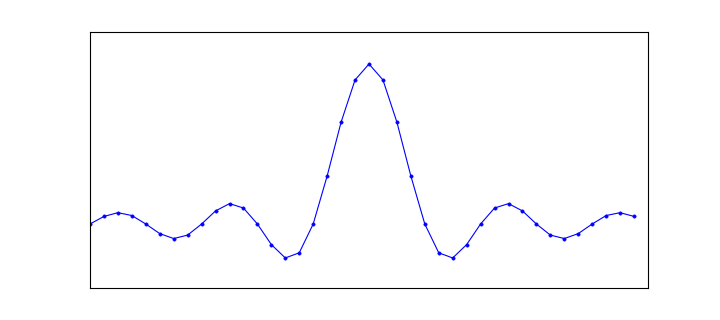

In [8]:
f3 = plt.figure(figsize=(9,4))
af3 = f3.add_subplot(111)
af3.plot(nn,ipol,'.-b')
af3.set_xlabel('n',fontsize=12)
af3.set_ylabel(r'$h_n$',fontsize=12)
af3.set_title('Truncated Sinc Function for Interpolation, M={:d}, k={:d}'.format(M,k),fontsize=16)
af3.grid()

<IPython.core.display.Javascript object>


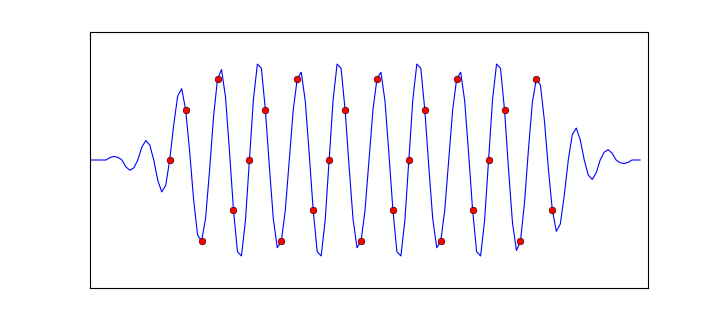

In [9]:
st2 = convolve(stMf,ipol)            # Perform low-pass filering/interpolation
tt2 = arange(len(st2))/float(Fs2)    # New time axis
tt2 = tt2 - k*M/float(Fs2)           # Compensate for expansion after full convolution
f4 = plt.figure(figsize=(9,4))
af4 = f4.add_subplot(111)
af4.plot(tt2,st2,'-b')
af4.plot(tt,st,'or',label='Original Samples')
af4.set_xlabel('t [sec]')
af4.set_ylabel('s(t)')
af4.set_title('Sine 100 Hz Before and After Upsampling by M={:d}'.format(M),fontsize=16)
af4.legend()
af4.grid()